# **Momentum-based Gradient Descent**

### **1. Introduction to Gradient Descent**
Gradient Descent (GD) is an optimization algorithm used to minimize a loss function by updating model parameters iteratively in the direction of the steepest descent. However, **vanilla GD** often faces issues like:

- **Slow convergence:** It can take many steps to reach the minimum.
- ***Oscillations:*** Updates can fluctuate and take longer in valleys.
- **Getting stuck in local minima**.

To overcome these problems, Gradient Descent with Momentum (GDM) introduces a concept similar to physics: **velocity**.

---

### **2. The Intuition Behind Momentum**

Momentum is inspired by physics:
- Imagine rolling a ball down a hill. Instead of moving straight down step by step, the ball **accelerates in the right direction**.
- **Momentum stores past gradients**, allowing the update direction to accumulate past knowledge and reduce oscillations.

**Key Benefits of Momentum:**
- ✅ **Faster convergence** — Accelerates movement along low-curvature directions.
- ✅ **Reduced oscillations** — Smooths out updates in noisy gradients.
- ✅ **Escapes local minima** — Accumulates velocity to jump out of shallow local minima.

---

### **3. Mathematical Formulation of GDM**
Let's define:
- $\theta_t$: Model parameters at iteration $t$.
- $\nabla L(\theta_t)$: Gradient of the loss function at $\theta_t$.
- $v_t$: Velocity term (momentum).
- $\alpha$: Learning rate.
- $\beta$: Momentum coefficient (e.g., 0.9).

**Step 1: Compute the Gradient**
$$ g_t = \nabla L(\theta_t) $$

**Step 2: Update the Velocity (Momentum Term)**
$$ v_t = \beta v_{t-1} + (1 - \beta) g_t $$

where:
- $\beta v_{t-1}$: Previous gradient (velocity) history (momentum).
- $(1 - \beta) g_t$: Current gradient.

**Step 3: Update the Parameters**
$$ \theta_{t+1} = \theta_t - \alpha v_t $$

This step moves the parameters in the direction of the accumulated gradient.

---

### **4. Choosing the Right Momentum Coefficient**
- **High $\beta$:** Smooths out updates and reduces oscillations, but can slow down convergence.
- **Low $\beta$:** Faster convergence, but may oscillate and overshoot.

| $\beta$ | Effect |
| --- | --- |
| 0 | No momentum, reduces to vanilla GD |
| 0.5 | Weak momentum, not very effective. |
| 0.9 | Common choice, balances speed and stability. |
| 0.99 | Very strong momentum, can overshoot. |

In [ ]:
import matplotlib.pyplot as plt

In [44]:
# Example: Minimizing f(x) = x^2 (simple quadratic loss)
def gradient(x):
    return 2*x  # Derivative of f(x) = x^2

In [ ]:
# Initialize variables
x = 10        # Start at x=10
alpha = 0.01  # Learning rate
beta = 0.9    # Momentum coefficient
v = 0         # Initial velocity

## **Momentum-based Gradient Descent**

In [ ]:
# Run gradient descent with momentum

x_history_momentum = [x]

for _ in range(50):
    grad = gradient(x)
    v = beta * v + (1 - beta) * grad  # Update velocity
    x = x - alpha * v  # Update x position
    x_history_momentum.append(x)

## **Standard Gradient Descent**

In [48]:
# Run standard gradient descent for comparison
x = 10

x_history_standard = [x]

for _ in range(50):
    grad = gradient(x)
    x = x - alpha * grad
    x_history_standard.append(x)

## **Plotting The Results**

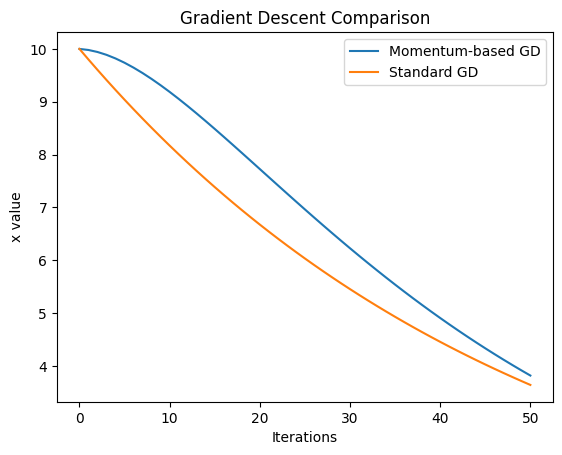

In [49]:
# Plot results
plt.plot(x_history_momentum, label="Momentum-based GD")
plt.plot(x_history_standard, label="Standard GD")

plt.xlabel("Iterations")
plt.ylabel("x value")
plt.title("Gradient Descent Comparison")
plt.legend()
plt.show()